In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier


## Loading the Dataset

In [65]:
df=pd.read_csv("supermarket_sales - Sheet1.csv")

## Observations

In [66]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [67]:
len(df.columns)

17

In [68]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [69]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [70]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]


In [71]:
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 8
Discrete features Count 2
Continuous features Count 6
Categorical features Count 9
Binary Categorical features Count 5


In [72]:
df["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [73]:
df["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [74]:
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [75]:
df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [76]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [77]:
df["Total"].mean()

322.966749

In [78]:
df["gross income"].median(), df["gross income"].mean()

(12.088000000000001, 15.379368999999999)

In [79]:
df["Product line"].mode()

0    Fashion accessories
Name: Product line, dtype: object

In [80]:
df["Gender"].mode()

0    Female
Name: Gender, dtype: object

## Data Visualizations

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

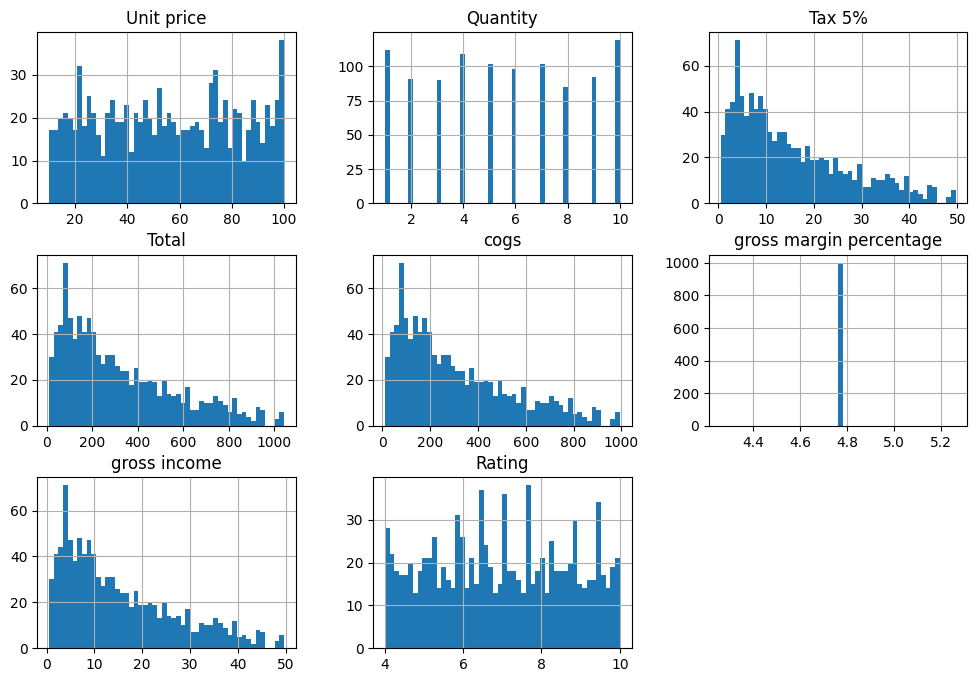

In [81]:
df.hist(bins=50,figsize=(12,8))

Text(0, 0.5, 'Gross Income')

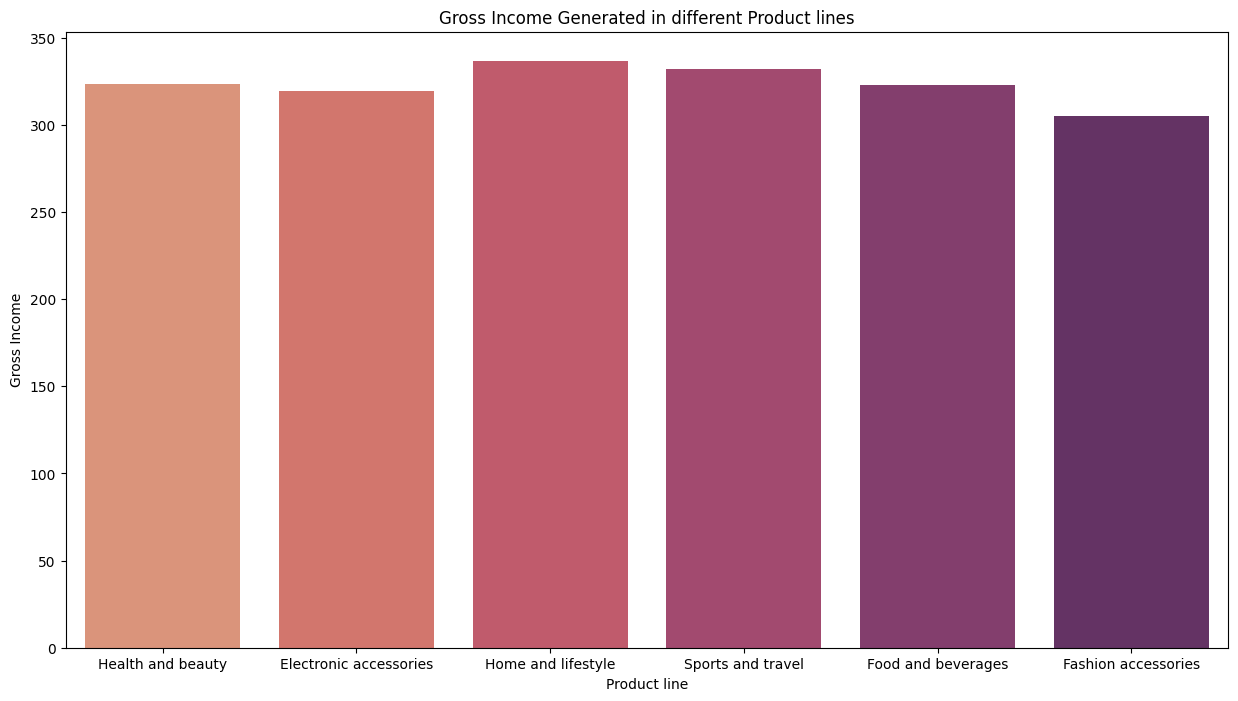

In [148]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['Product line'], y=df['Total'],errorbar=None, palette="flare")
plt.title("Gross Income Generated in different Product lines")
plt.ylabel("Gross Income")

Text(0, 0.5, 'Gross Income')

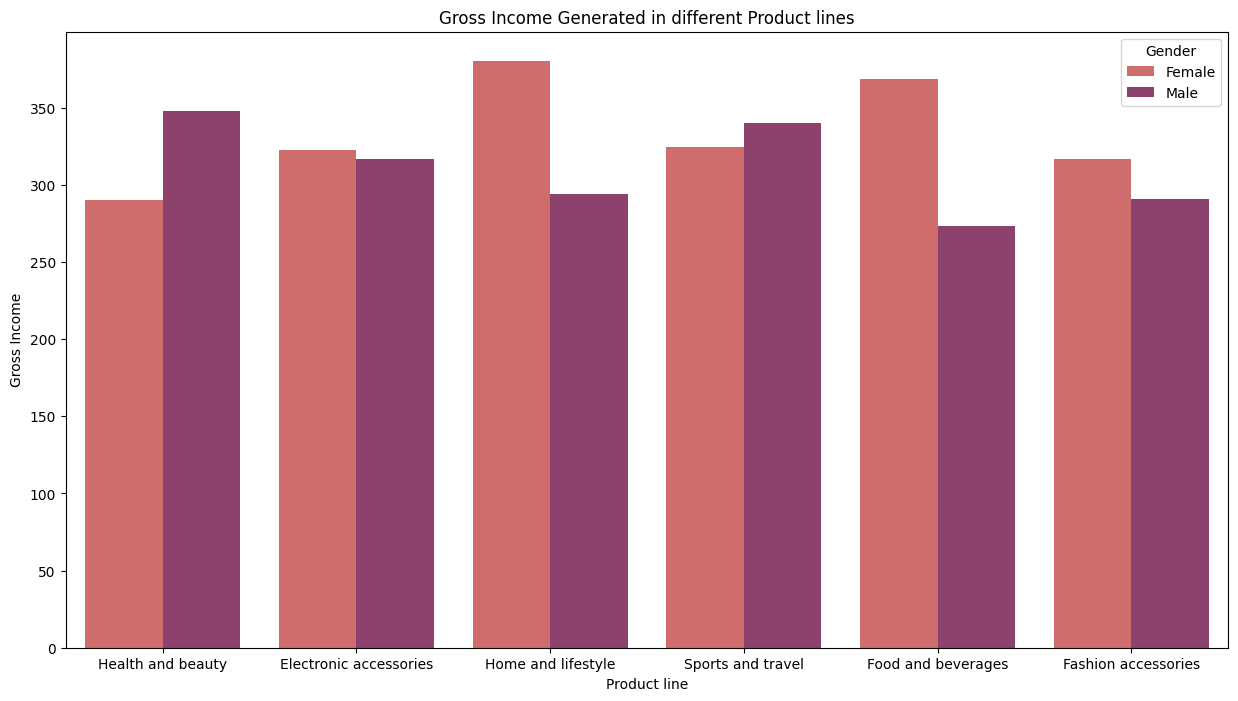

In [82]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['Product line'], y=df['Total'], hue=df['Gender'], errorbar=None, palette="flare")
plt.title("Gross Income Generated in different Product lines")
plt.ylabel("Gross Income")

<Axes: title={'center': 'City Wise Billings'}, xlabel='City', ylabel='Total'>

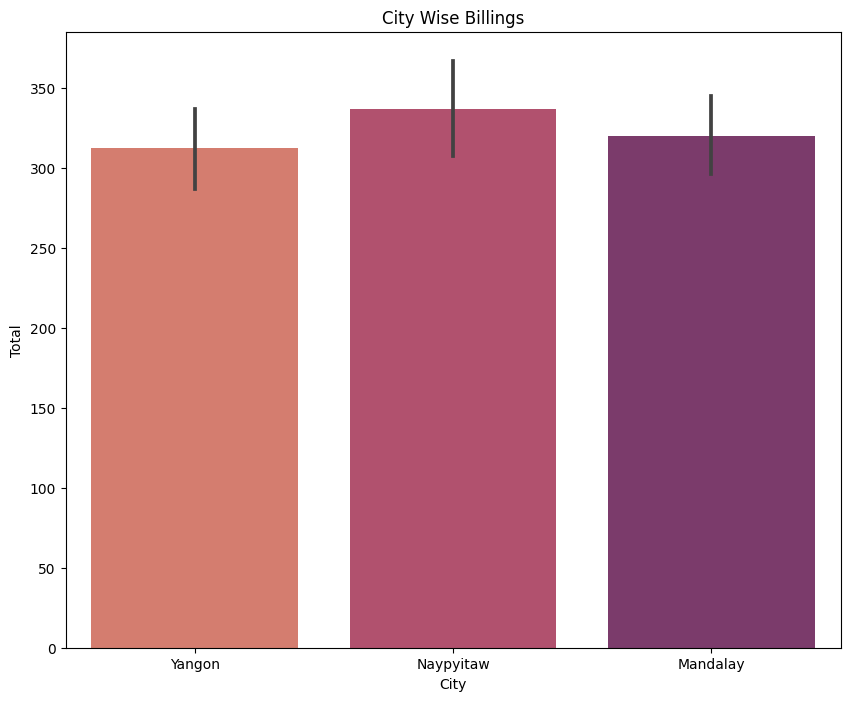

In [146]:
plt.figure(figsize=(10,8))
plt.title("City Wise Billings")
sns.barplot(x=df["City"],y=df["Total"],palette="flare")

Text(0, 0.5, 'Gross Income')

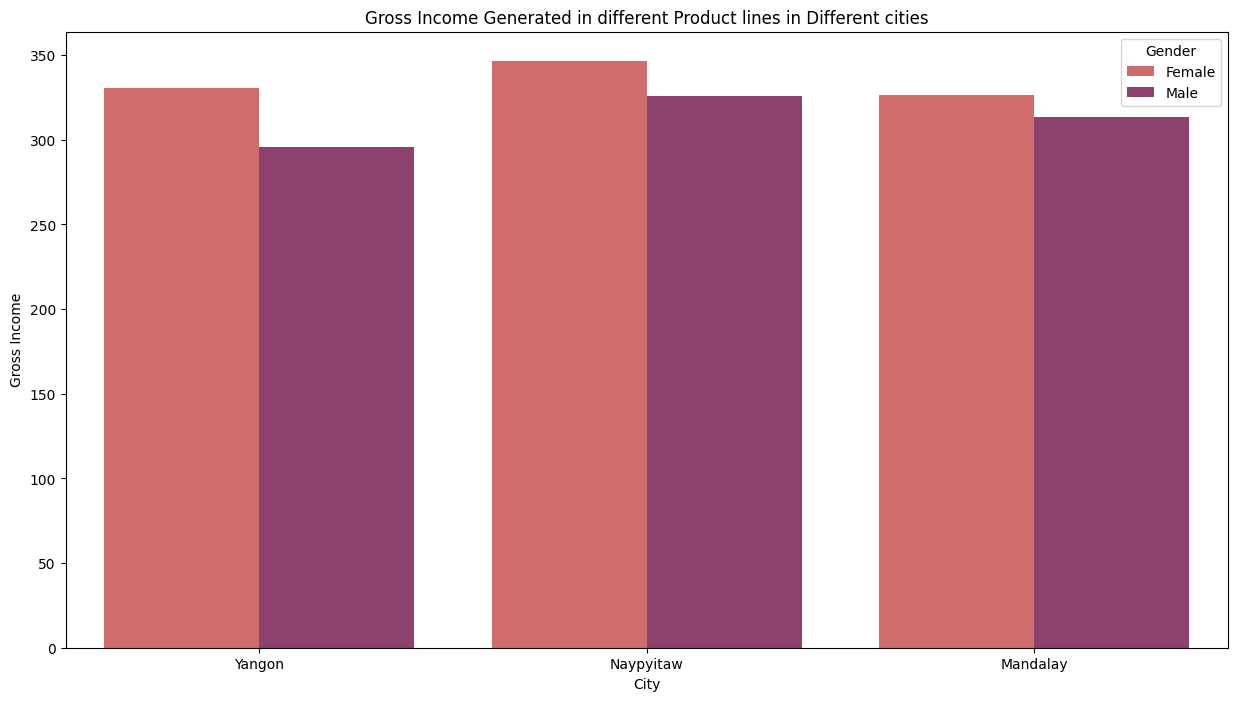

In [149]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['City'], y=df['Total'], hue=df['Gender'], errorbar=None, palette="flare")
plt.title("Gross Income Generated in different Product lines in Different cities")
plt.ylabel("Gross Income")

Text(0, 0.5, 'Gross Income')

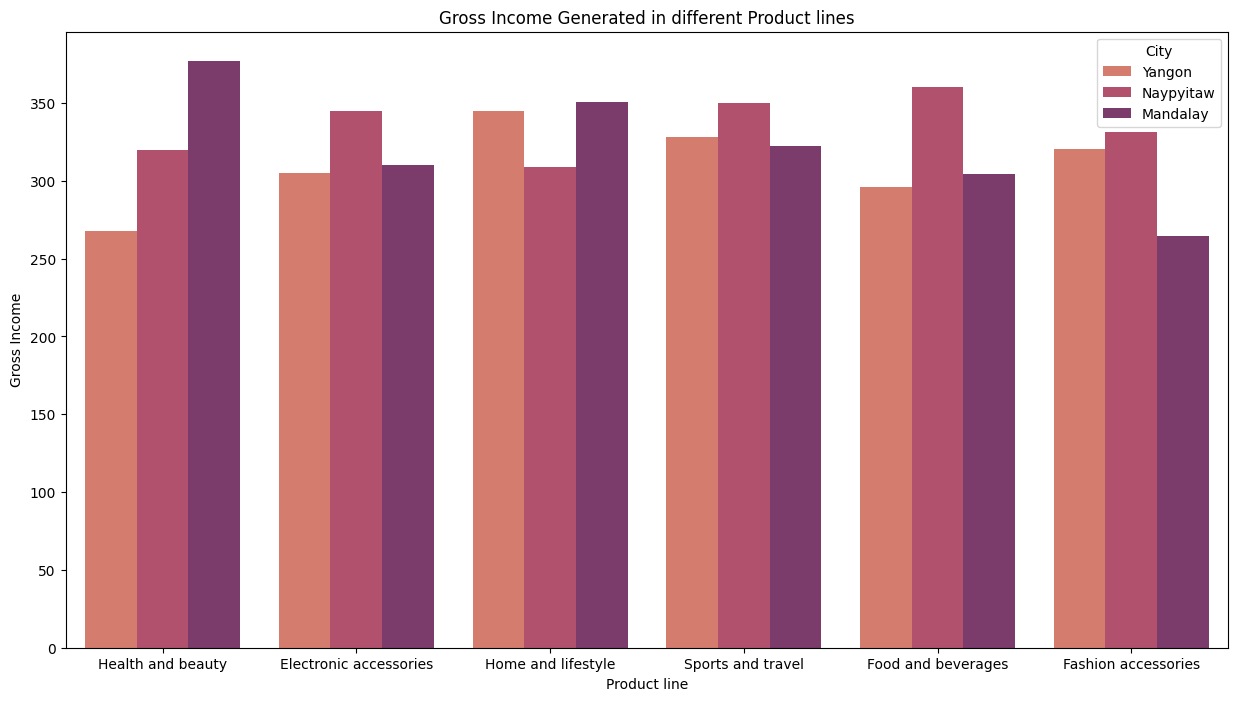

In [143]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['Product line'], y=df['Total'], hue=df['City'], errorbar=None, palette="flare")
plt.title("Gross Income Generated in different Product lines in Different cities")
plt.ylabel("Gross Income")

<Axes: title={'center': 'Gender Wise Billings'}, xlabel='Gender', ylabel='Total'>

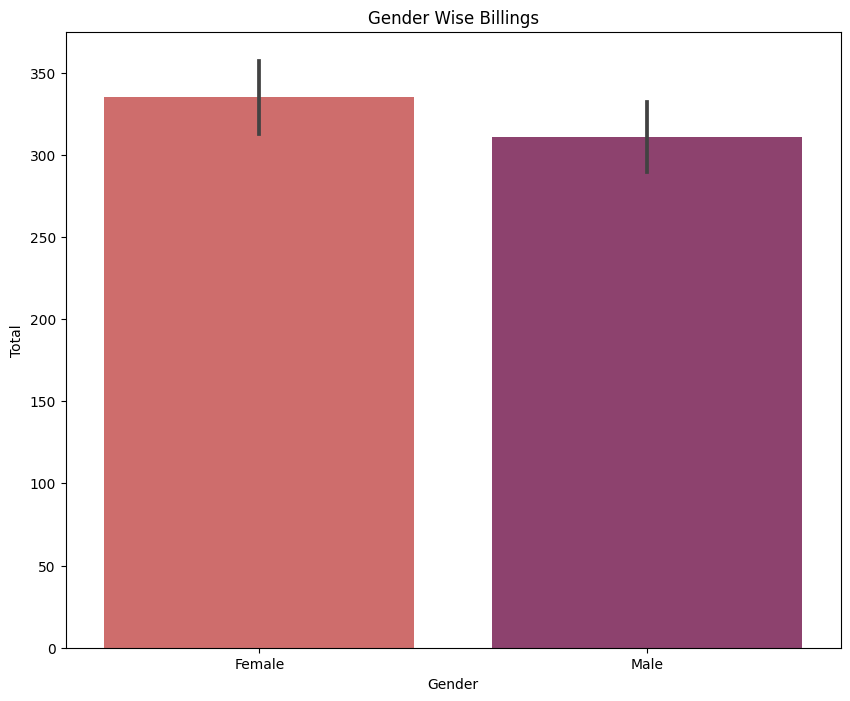

In [140]:
plt.figure(figsize=(10,8))
plt.title("Gender Wise Billings")
sns.barplot(x=df["Gender"],y=df["Total"],palette="flare")

<Axes: xlabel='Customer type', ylabel='Total'>

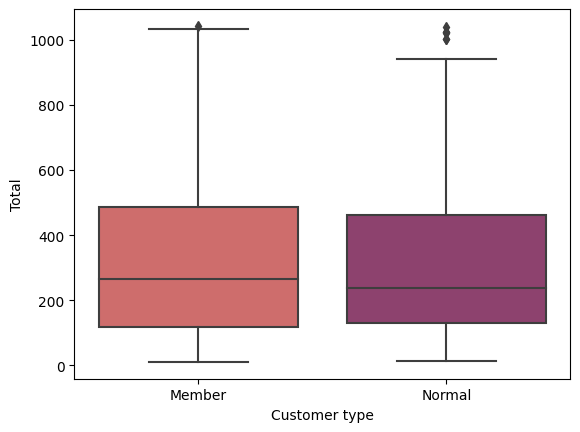

In [116]:
sns.boxplot(x=df["Customer type"], y=df["Total"],palette="flare")

<Axes: xlabel='Customer type', ylabel='gross income'>

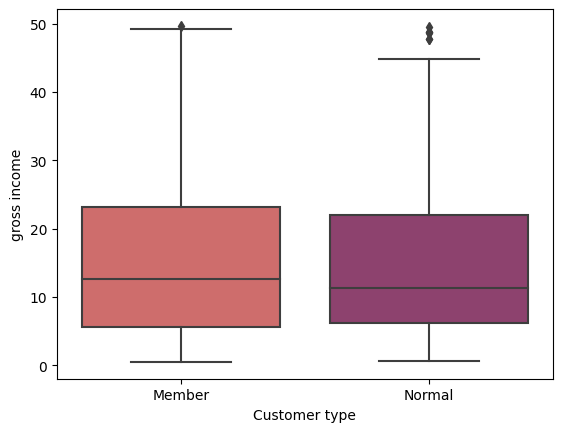

In [117]:
sns.boxplot(x=df["Customer type"], y=df["gross income"],palette="flare")
# normal members have some exceptions

<Axes: xlabel='Gender', ylabel='gross income'>

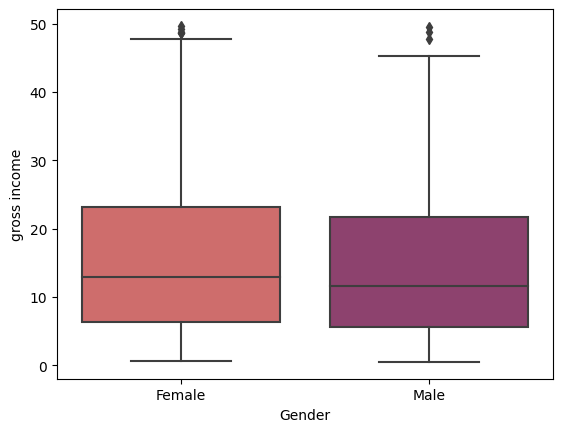

In [121]:
sns.boxplot(x=df["Gender"], y=df["gross income"],palette="flare")

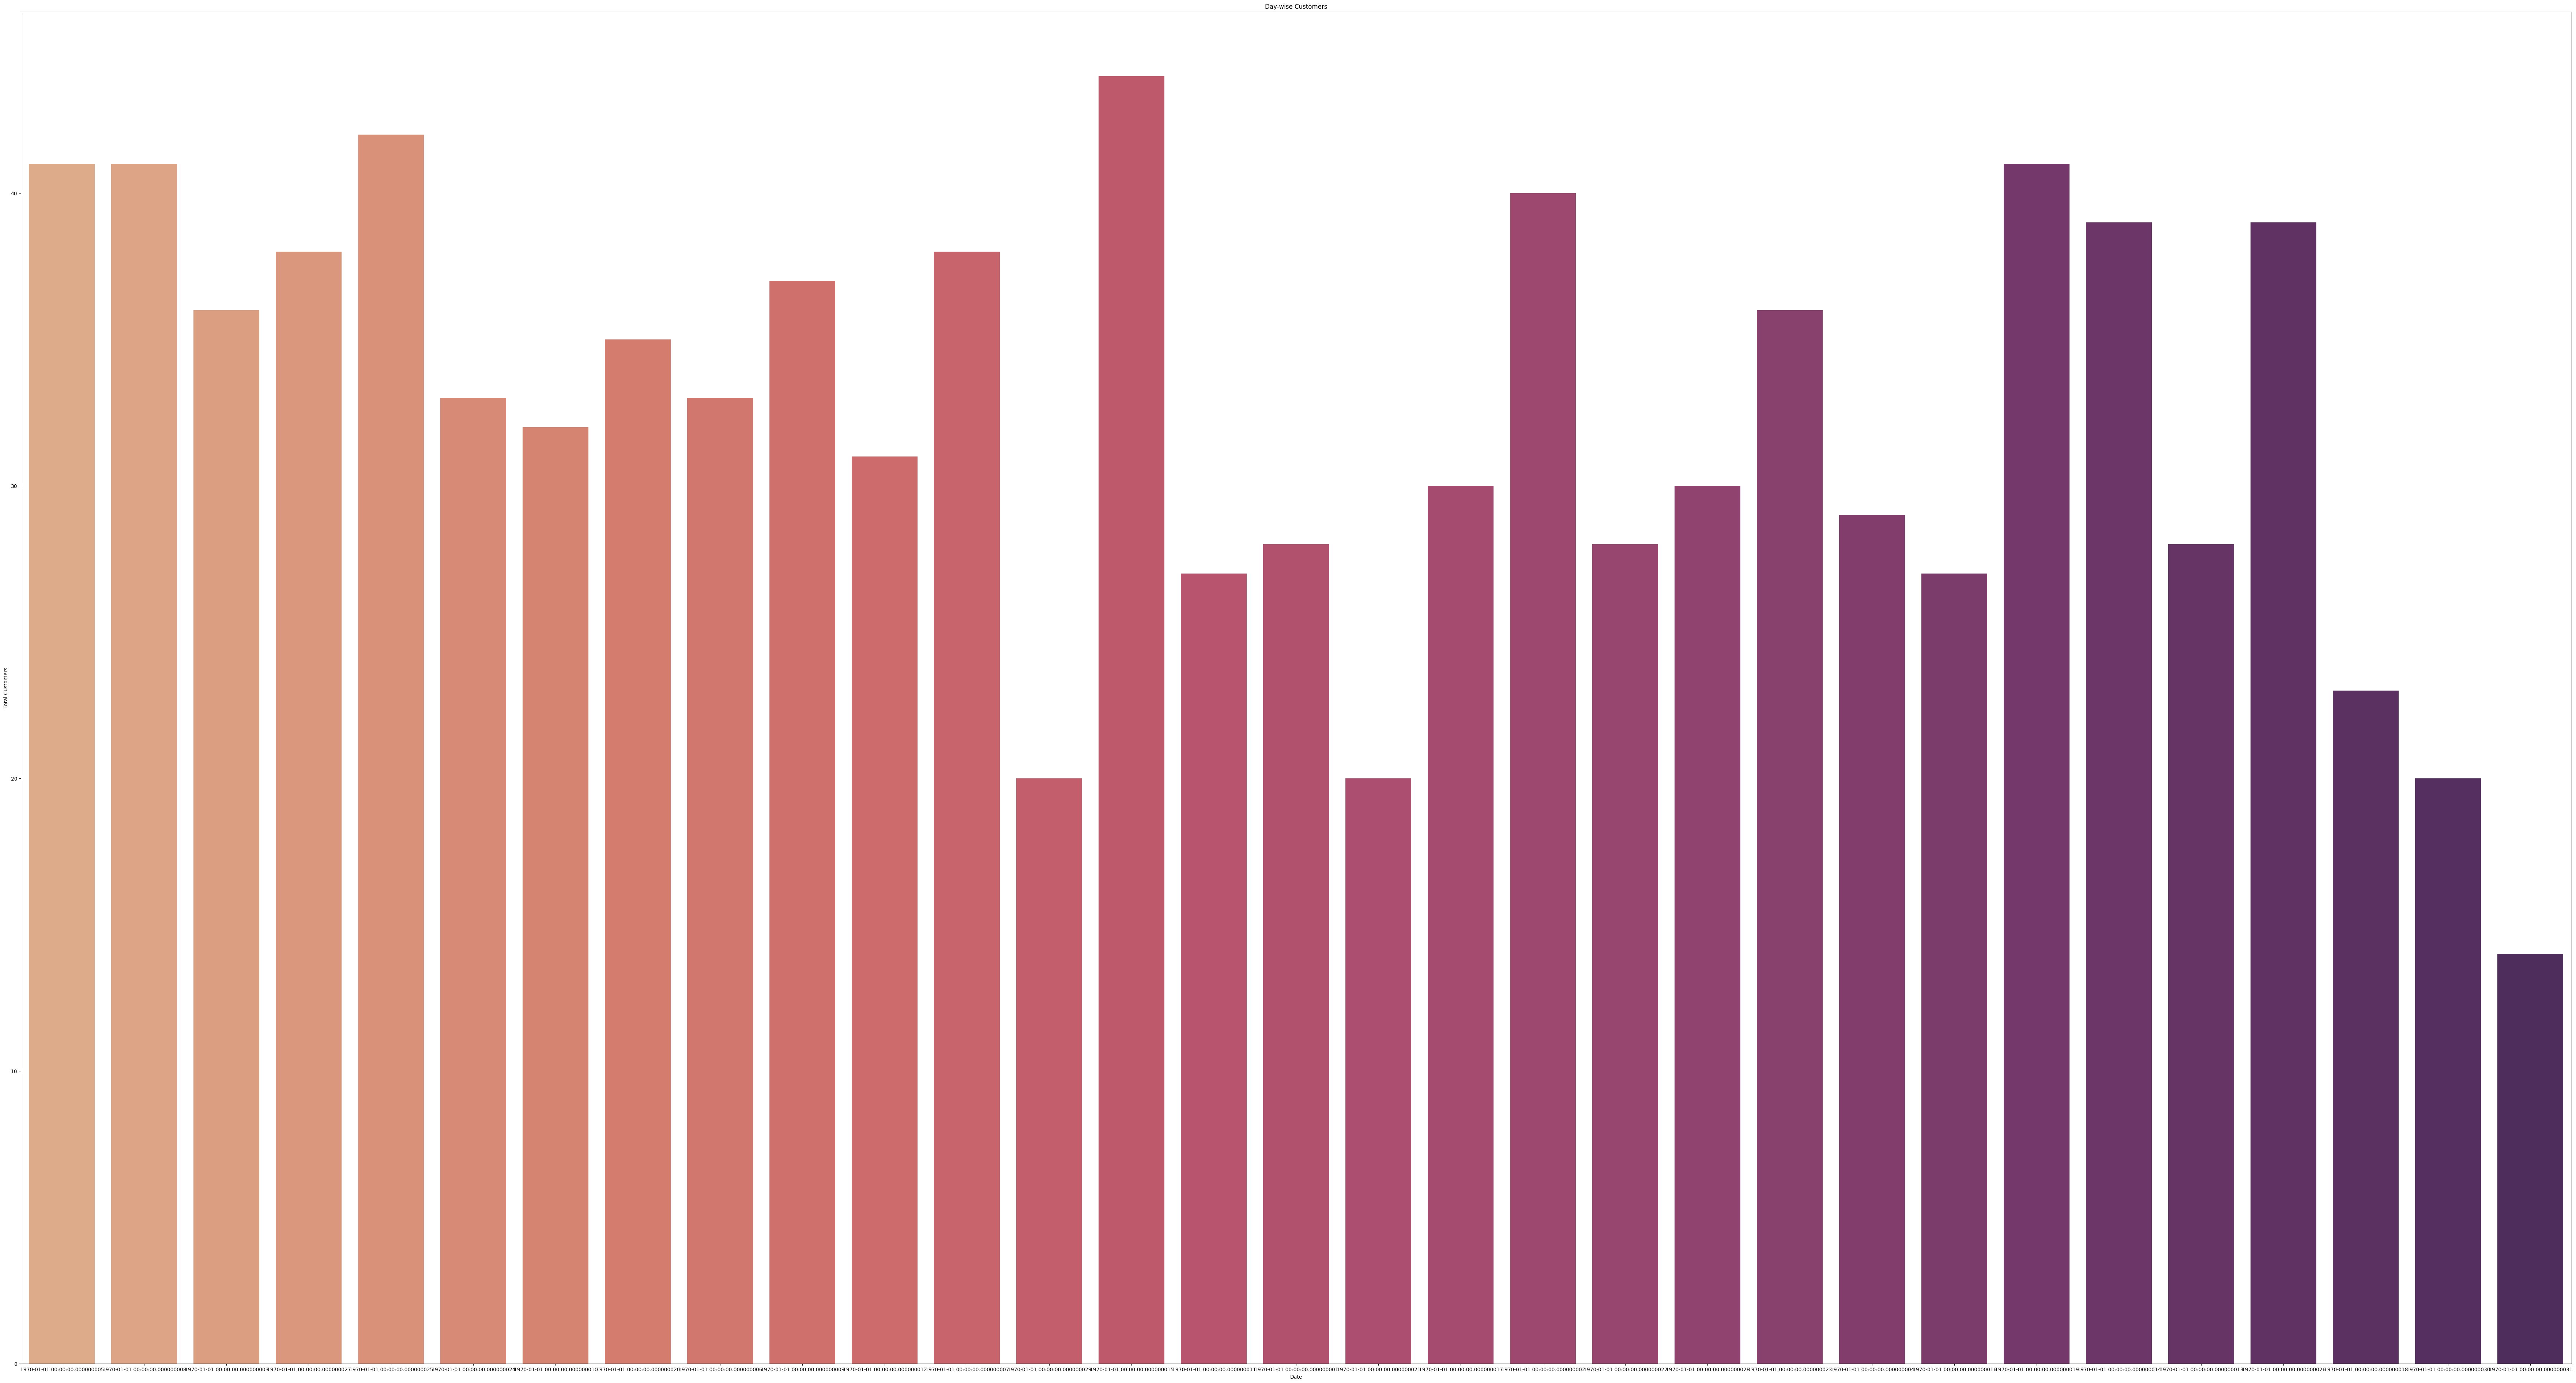

In [138]:
plt.figure(figsize=(90,48))
sns.countplot(x=pd.DatetimeIndex(pd.DatetimeIndex(df['Date']).day),palette="flare")
plt.title("Day-wise Customers")
plt.ylabel("Total Customers")
plt.show()

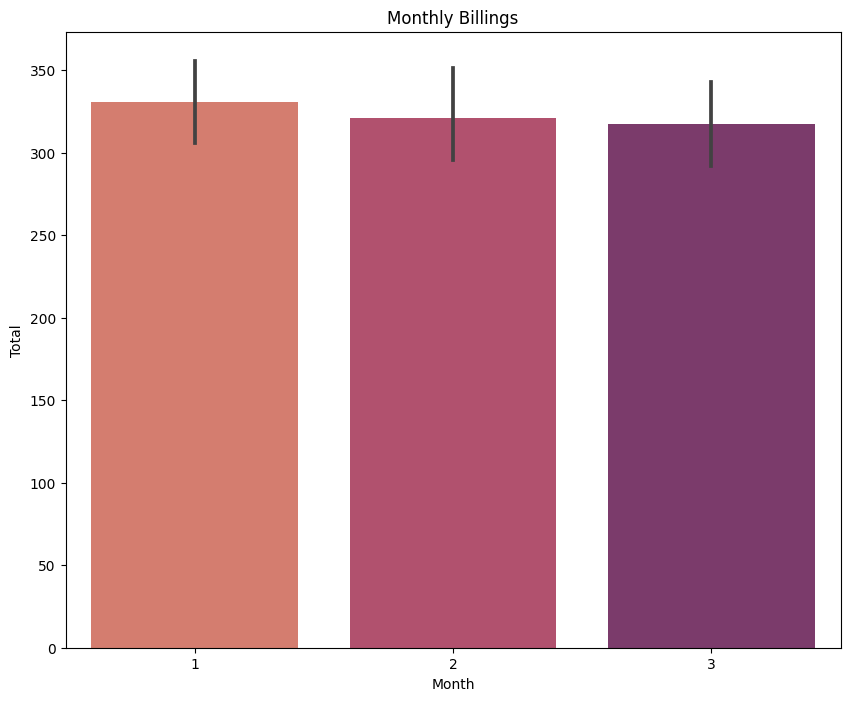

In [139]:
plt.figure(figsize=(10,8))
plt.title("Monthly Billings")
sns.barplot(x=pd.DatetimeIndex(df['Date']).month,y=df["Total"],palette="flare")
plt.xlabel("Month")
plt.show()

Text(0, 0.5, 'Gross Income')

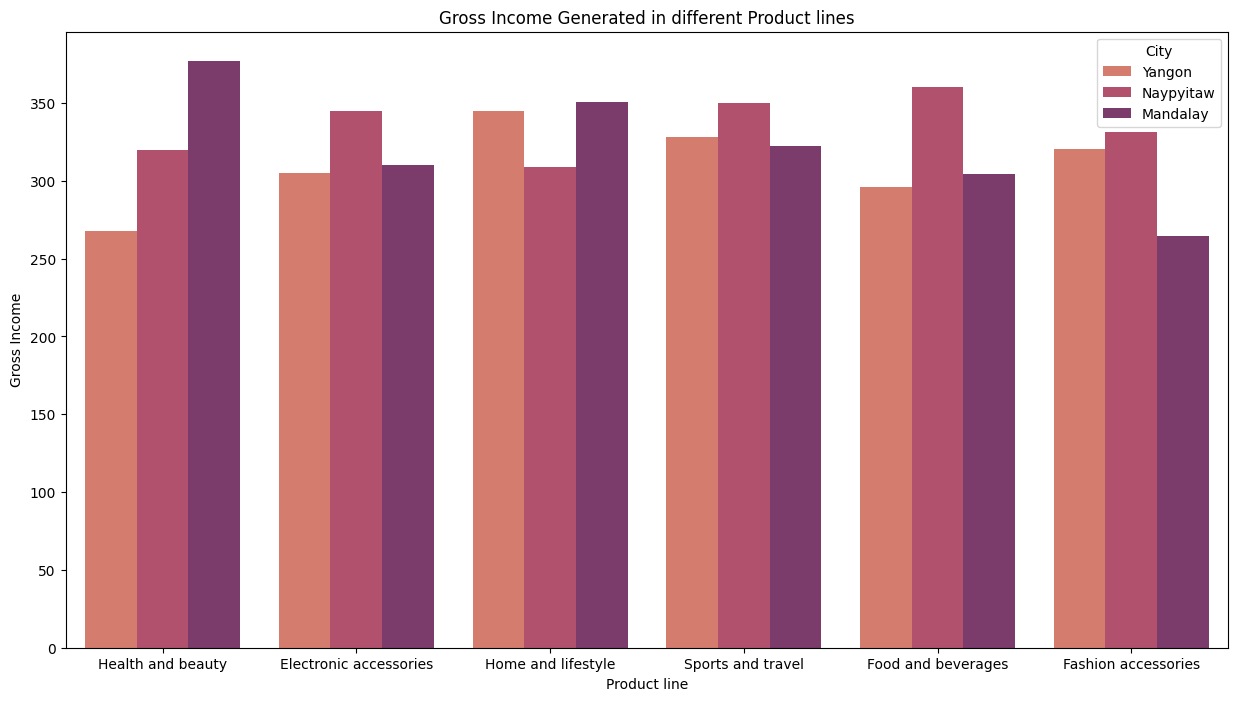

## Data Preprocessing